# Finding the Best Markets to Advertise In

---
## Introduction

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

***Our goal in this project is to find out the two best markets to advertise our product in***

---

## Our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
print(data.shape)

(18175, 136)


In [3]:
pd.options.display.max_columns = 150
data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

---
## Create representating sampling

In [4]:
data['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

People are interested in different subjects at the same time
We can see that a lot of people are intereted in at least one of mobile or web developpment.

In [5]:
data['JobRoleInterest'].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [6]:
interess_nona=data['JobRoleInterest'].dropna()
interess=interess_nona.str.split(',')

interess_count=interess.apply(lambda x: len(x))
interess_count.value_counts(normalize=True)*100
    

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Most a the participant don't have a clear idea of what they wants, only 31% are sure

In [7]:
web_app=interess_nona.str.contains('Web Developer|Mobile Developer')
freq_table=web_app.value_counts(normalize=True)*100

([<matplotlib.axis.XTick at 0x7faa09c9a6d8>,
 <a list of 2 Text xticklabel objects>)

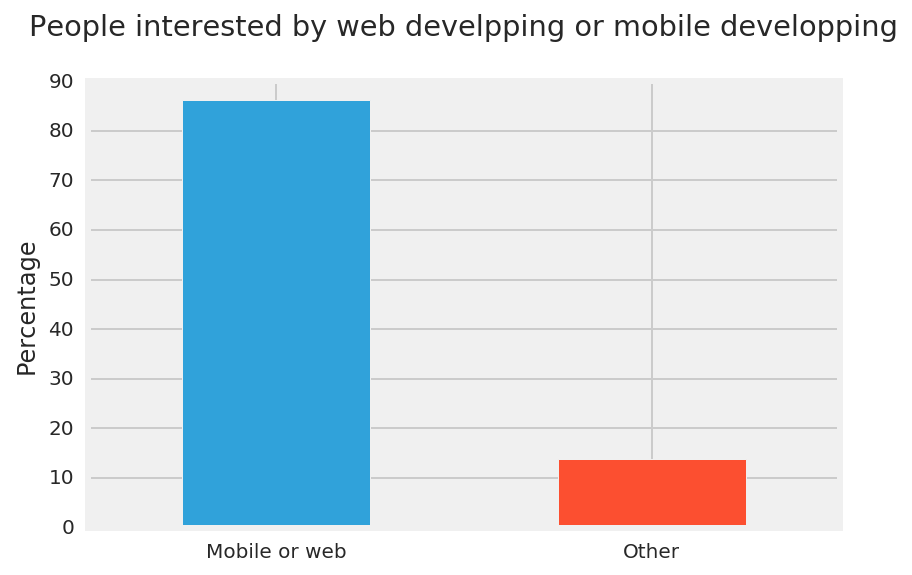

In [8]:
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
freq_table.plot.bar()
plt.title('People interested by web develpping or mobile developping',y=1.08)
plt.ylabel('Percentage')
plt.xticks([0,1],['Mobile or web','Other'],rotation=0)

Even if most of the people are not sure about what they want to learn, most of them are indeed interested in learning about web our app developpement

---
## Country to target

In [9]:
data_interested=data[data['JobRoleInterest'].notnull()].copy()

In [10]:
absolute_freq=data_interested['CountryLive'].value_counts()
relative_freq=data_interested['CountryLive'].value_counts(normalize=True)*100

freq_table_country=pd.DataFrame(data={'absolute':absolute_freq,'relative':relative_freq})
freq_table_country.head()

,absolute,relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


As we see it, the two market that are favorable for us are USA and India, but let's have a closer look on the data:

---
## Digging further

In [11]:
data_interested['MonthsProgramming'].replace(0,1, inplace = True)
data_interested['spent_per_month']=data_interested['MoneyForLearning']/data_interested['MonthsProgramming']

In [12]:
data_interested = data_interested[data_interested['CountryLive'].notnull()]
data_interested['spent_per_month'].value_counts()

0.000000        3040
50.000000        123
25.000000        119
16.666667        117
100.000000       117
33.333333        107
8.333333         104
20.000000         85
83.333333         79
10.000000         79
166.666667        67
12.500000         65
4.166667          64
5.000000          62
200.000000        50
500.000000        50
66.666667         46
250.000000        44
41.666667         44
1000.000000       41
3.333333          37
20.833333         37
6.666667          35
125.000000        35
2.500000          33
5.555556          31
333.333333        31
11.111111         31
150.000000        30
30.000000         28
                ... 
13.500000          1
1.562500           1
29.000000          1
23.000000          1
19.000000          1
31.000000          1
3.625000           1
4.750000           1
117.500000         1
54.166667          1
866.666667         1
0.900000           1
1.344086           1
1670.000000        1
4.857143           1
122.500000         1
370.000000   

3092 persons have never paid to learn coding

In [20]:
data_interested_not_null=data_interested[data_interested['spent_per_month'].notnull()]


In [18]:
country_mean=data_interested_not_null.groupby('CountryLive').mean()

In [19]:
country_mean['spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
                                
                                
                                
                                

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

As that point everything confirm our expectations, USA and India are good places to target

---
## Plots to find any outliers

In [27]:
only_4=data_interested_not_null[data_interested_not_null['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7faa04b38cf8>,
 <a list of 4 Text xticklabel objects>)

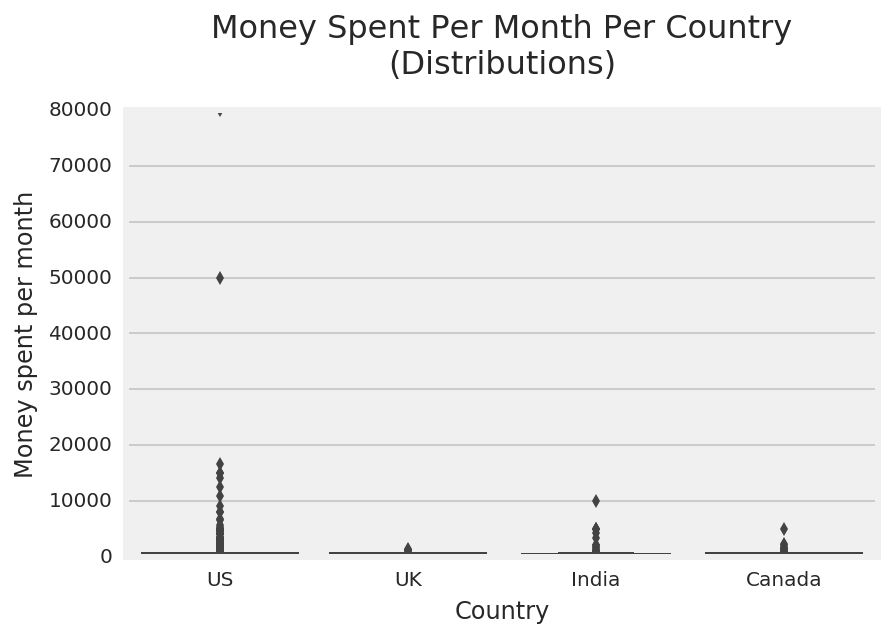

In [36]:
sns.boxplot(x='CountryLive',y='spent_per_month',data=only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16,y=1.06)
plt.xlabel('Country')
plt.ylabel('Money spent per month')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [39]:
data_clean=data_interested_not_null[data_interested_not_null['spent_per_month']<20000]

In [40]:
country_mean_clean=data_clean.groupby('CountryLive').mean()

In [41]:
country_mean_clean['spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

In [45]:
only_4=data_clean[data_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7faa0471b908>,
 <a list of 4 Text xticklabel objects>)

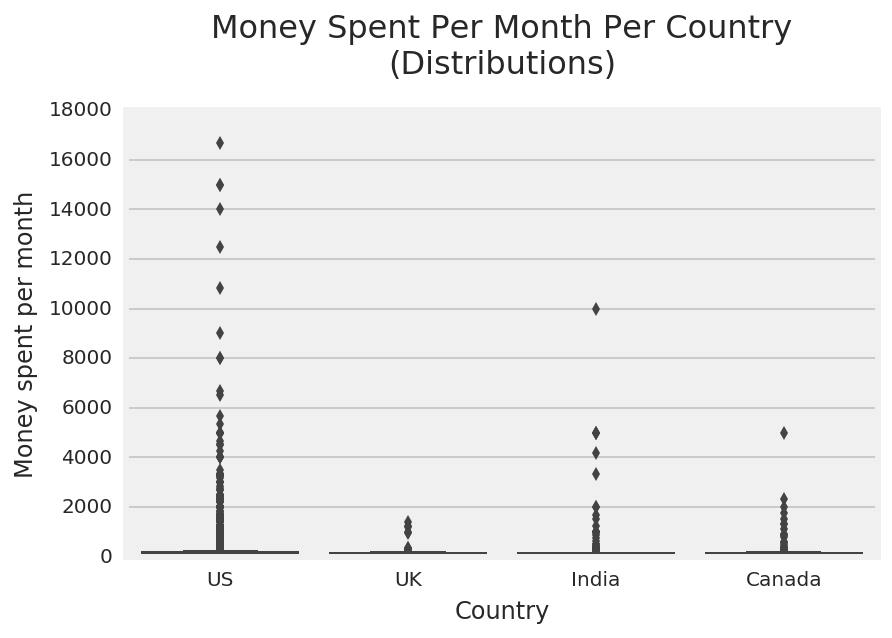

In [46]:
sns.boxplot(x='CountryLive',y='spent_per_month',data=only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16,y=1.06)
plt.xlabel('Country')
plt.ylabel('Money spent per month')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [53]:
india_outliers=data_clean[(data_clean['spent_per_month']>2500) & (data_clean['CountryLive']=='India')]

In [55]:
only_4=only_4.drop(india_outliers.index)

In [57]:
us_outliers=data_clean[(data_clean['spent_per_month']>6000) & (data_clean['CountryLive']=='United States of America')&
    (only_4['AttendedBootcamp'] == 0)]




In [58]:
only_4=only_4.drop(us_outliers.index)

In [60]:
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['spent_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [62]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['spent_per_month'] > 4500)]

only_4 = only_4.drop(canada_outliers.index)

In [63]:
only_4.groupby('CountryLive').mean()['spent_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: spent_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



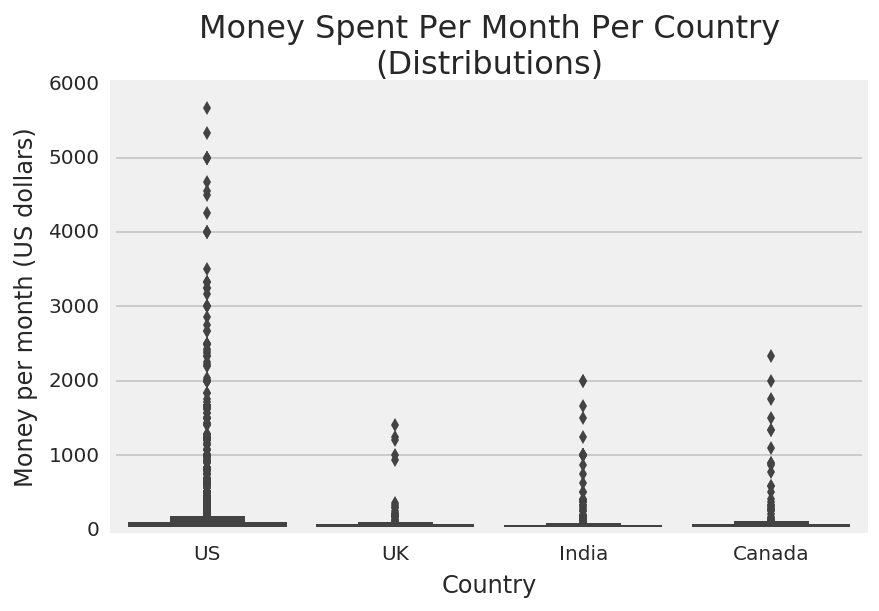

In [64]:
sns.boxplot(y = 'spent_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It is obvious to first choose USA, that gather most of the coder and are willing to pay a good amount of money. 

But it is not clear which one will be the second target? Canada or India?

Canada show us that there are willing to pay a large amount but there is twice as much people in India that are potential clients.

The best way to invest now is to mix the investment, primarily in USA and then splitted between India 